# **Hyperparameters**

In [ ]:
# Height, Width
imageSize = (104,88)

# **Imports** <br>
**Imports to create deep learning model**



In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers

**Imports to handle data loading and pre-processing**

In [ ]:
import zipfile
import os
from skimage import io
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Loading in images <br>
**Unzips zipped training folder**

In [ ]:
# Unzips file in path and extracts in to folder
with zipfile.ZipFile('/content/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/train')

**Store image path and classes** <br>
Gets the image path and its class <br>
Used to create the final dataset

In [ ]:
# Gets all the class names
datasetPath = '/content/train/Dataset/' # Change for data sets


classes = os.listdir(datasetPath)
# Adding all data to dataFiles
dataFiles = np.empty(shape=(0,2))
for c in classes:
  # Creates the image file path in element [0] and the class of the image in element [1]
  imgFile = np.array(list(map(lambda x: (f'{datasetPath}{c}/{x}', c), os.listdir(f'{datasetPath}{c}'))))
  prevLength = len(dataFiles)
  
  dataFiles = np.concatenate((dataFiles, imgFile))
  
  print(f'{datasetPath}{c}: {len(dataFiles)} image files total. {len(dataFiles) - prevLength} images in class {c}')

/content/train/Dataset/Very_Mild_Demented: 2240 image files total. 2240 images in class Very_Mild_Demented
/content/train/Dataset/Moderate_Demented: 2304 image files total. 64 images in class Moderate_Demented
/content/train/Dataset/Non_Demented: 5504 image files total. 3200 images in class Non_Demented
/content/train/Dataset/Mild_Demented: 6400 image files total. 896 images in class Mild_Demented


In [ ]:
print(f'{dataFiles[0]}, {dataFiles[717]}, {dataFiles[769]}, {dataFiles[3329]}')

['/content/train/Dataset/Very_Mild_Demented/verymild_346.jpg'
 'Very_Mild_Demented'], ['/content/train/Dataset/Very_Mild_Demented/verymild_247.jpg'
 'Very_Mild_Demented'], ['/content/train/Dataset/Very_Mild_Demented/verymild_1590.jpg'
 'Very_Mild_Demented'], ['/content/train/Dataset/Non_Demented/non_931.jpg' 'Non_Demented']


**Reads images** <br>
Reads images into a dataset

In [ ]:
dataSet = np.array(list(map(lambda x: (io.imread(x[0]), x[1]), dataFiles)))

<ipython-input-606-25a983d1a1c9>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataSet = np.array(list(map(lambda x: (io.imread(x[0]), x[1]), dataFiles)))


**outImg function** <br>
Fuction will output an array of images

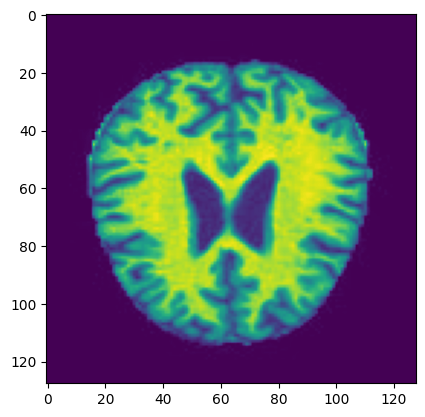

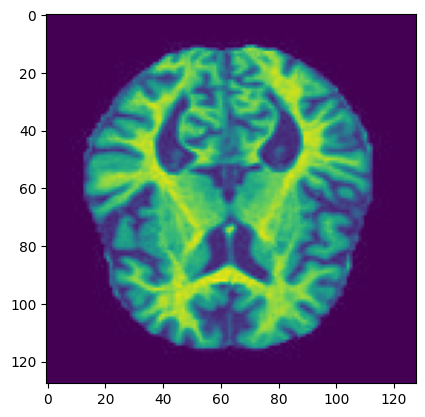

In [ ]:
def outImg(arr):
  for I in arr:
    imgplot = plt.imshow(I)
    plt.show()
  
outImg(dataSet[0:2,0])

# Data pre-processing <br>
Images have now been loaded into the dataset adn can now be pre-processed.<br>
This could invlove grey scaling, resizing, binarizing and any other image processing technique.  

**Shuffling, Splitting and String indexer**

['Very_Mild_Demented' 'Very_Mild_Demented' 'Very_Mild_Demented'
 'Very_Mild_Demented' 'Very_Mild_Demented']
[1 1 1 1 1]
[1 0 1 1]


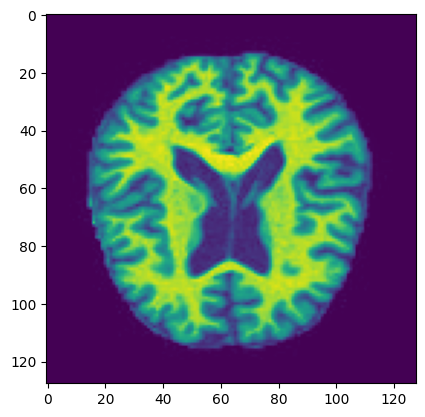

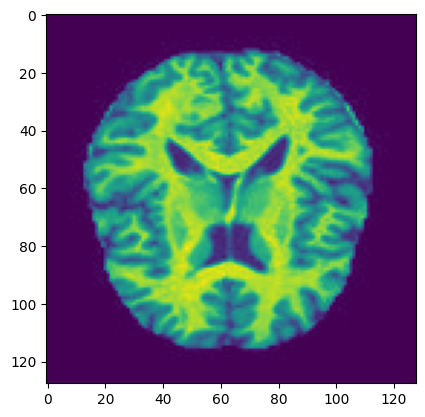

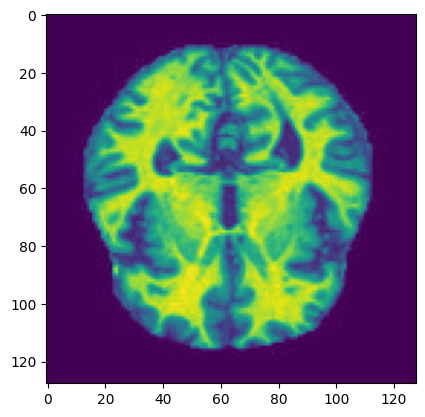

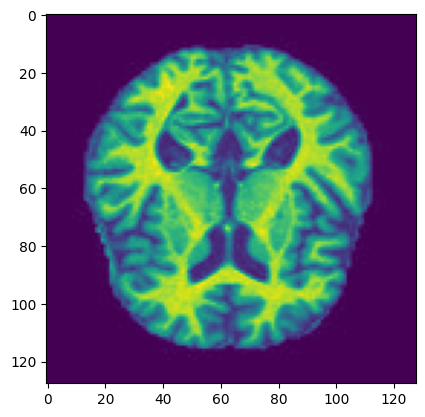

In [ ]:
## Making class dictionary to chnage class labels to numbers
strDict = {"Non_Demented": 0, "Very_Mild_Demented": 1,   "Mild_Demented": 2, "Moderate_Demented": 3} # Change for data sets

# dataSet is split into images and labels
images = dataSet[:,0]
labels = dataSet[:,1]


print(labels[0:5])
listLabels = list(labels)
labels = np.array(list(map(lambda x: strDict[x], listLabels)))
print(labels[0:5])

#CHANGE#

# Data is split into training and testing
images_train, images_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.33, random_state=1) # Take out random_state when testing without a fair test

# Training data is split into validation data
images_train, images_val, labels_train, labels_val = train_test_split(images_train, labels_train, test_size=0.2, random_state=1)

print(labels_train[0:4])
outImg(images_train[0:4])

[1 1 1]


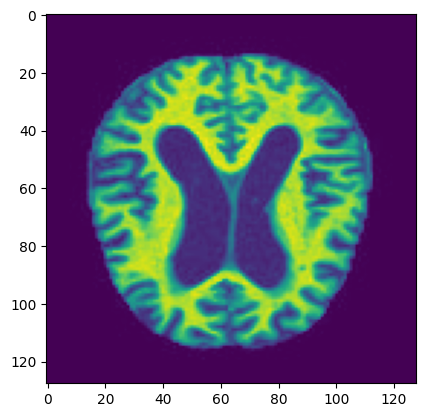

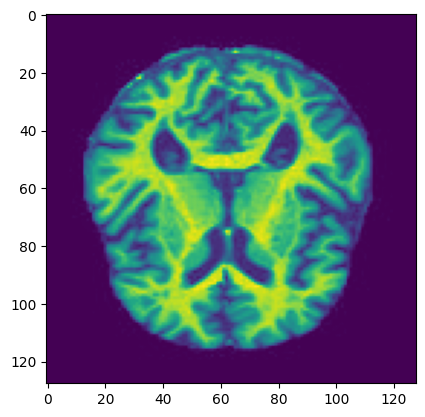

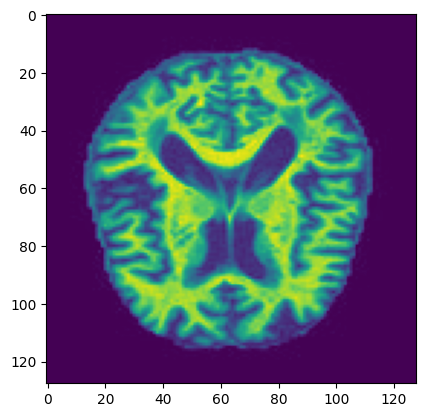

In [ ]:
print(labels_train[48:51])
outImg(images_train[48:51])

**Re-sizing images**

In [ ]:
new_images_train = []
for im in images_train:
  im = resize(im, imageSize, anti_aliasing=True)
  new_images_train.append(im)
images_train = new_images_train

new_images_test = []
for im in images_test:
  im = resize(im, imageSize, anti_aliasing=True)
  new_images_test.append(im)
images_test = new_images_test

#CHANGE#
new_images_val = []
for im in images_val:
  im = resize(im, imageSize, anti_aliasing=True)
  new_images_val.append(im)
images_val = new_images_val

In [ ]:
# Shows the size of all the images
print(f'Training images size {np.shape(images_train)}')
print(f'Testing images size {np.shape(images_test)}')

Training images size (3430, 104, 88)
Testing images size (2112, 104, 88)


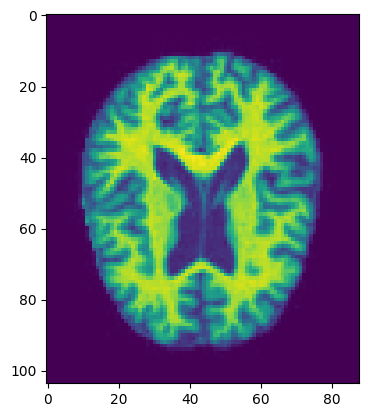

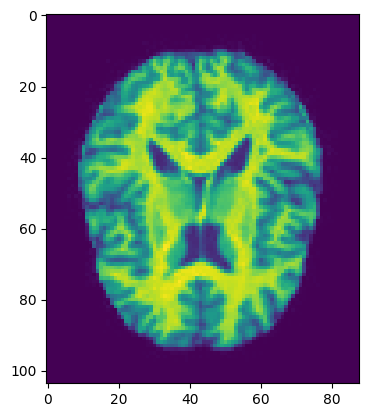

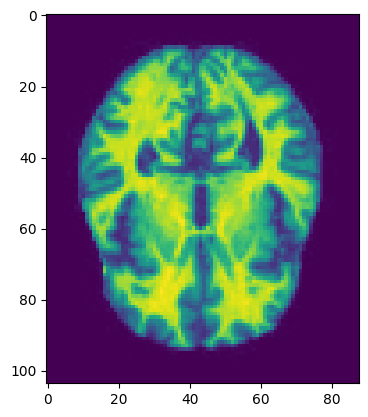

In [ ]:
outImg(images_train[0:3])

# Creating Sequential deep learning model

In [ ]:
model = keras.Sequential()
input_layer = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(imageSize[0],imageSize[1],1))
input_layer._name = 'input' # Setting name of layer
model.add(input_layer)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(4, activation='softmax'))

model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Conv2D)              (None, 102, 86, 32)       320       
                                                                 
 max_pooling2d_84 (MaxPoolin  (None, 51, 43, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_85 (Conv2D)          (None, 49, 41, 64)        18496     
                                                                 
 max_pooling2d_85 (MaxPoolin  (None, 24, 20, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_86 (Conv2D)          (None, 22, 18, 64)        36928     
                                                                 
 max_pooling2d_86 (MaxPoolin  (None, 11, 9, 64)      

**Adding optimiser and loss functions** <br>
Changed shpa eof data to add channel as tf requires one

In [ ]:
# optimizer = 'adam'
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

images_train = np.array([np.array(val) for val in images_train])
images_test = np.array([np.array(val) for val in images_test])

images_train = tf.expand_dims(images_train, axis=-1)
images_test = tf.expand_dims(images_test, axis=-1)

#CHANGE#
images_val = np.array([np.array(val) for val in images_val])
images_val = tf.expand_dims(images_val, axis=-1)

print(labels_train[0:4])
print(f'Using the string indexer\n{labels_train[0:4]}')

[1 0 1 1]
Using the string indexer
[1 0 1 1]


# Space to play

In [ ]:
#CHANGE#
print(len(images_val))
print(len(labels_val))

858
858


**Fitting the model**

In [ ]:
history = model.fit(images_train, labels_train, epochs=44, validation_data=(images_val, labels_val)) # change to validation_split=0.2 #CHANGE#

Epoch 1/52
108/108 [==============================] - 3s 15ms/step - loss: 1.0590 - accuracy: 0.4799 - val_loss: 1.0380 - val_accuracy: 0.4697
Epoch 2/52
108/108 [==============================] - 1s 13ms/step - loss: 1.0164 - accuracy: 0.4997 - val_loss: 0.9877 - val_accuracy: 0.5443
Epoch 3/52
108/108 [==============================] - 2s 14ms/step - loss: 0.9597 - accuracy: 0.5437 - val_loss: 0.9606 - val_accuracy: 0.5991
Epoch 4/52
108/108 [==============================] - 2s 14ms/step - loss: 0.9208 - accuracy: 0.5738 - val_loss: 0.9074 - val_accuracy: 0.6212
Epoch 5/52
108/108 [==============================] - 1s 12ms/step - loss: 0.9080 - accuracy: 0.5726 - val_loss: 0.8911 - val_accuracy: 0.6049
Epoch 6/52
108/108 [==============================] - 1s 12ms/step - loss: 0.8651 - accuracy: 0.6029 - val_loss: 0.8360 - val_accuracy: 0.6235
Epoch 7/52
108/108 [==============================] - 1s 12ms/step - loss: 0.8225 - accuracy: 0.6259 - val_loss: 0.8321 - val_accuracy: 0.6061

In [ ]:
model.evaluate(images_test, labels_test, verbose=1)
# 94% for https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset/code?resource=download
# 97% for other

66/66 [==============================] - 0s 6ms/step - loss: 0.2262 - accuracy: 0.9351


[0.22621789574623108, 0.9351325631141663]

# Saving model <br>
Save the model if it is any good, then download it for re-use

In [ ]:
# model.save('/content/24_03_2023_model2')

In [ ]:
# Unzip model 
#!zip -r /content/24_03_2023_model2.zip /content/24_03_2023_model2


# Takes a little for folder to show
# Unzips file in path and extracts in to folder
# with zipfile.ZipFile('/content/modelDownload.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/model')

In [ ]:
# Loading and evaluating model
# model2 = keras.models.load_model('/content/model/content/24_01_2023_model2/')
# model2.summary()

In [ ]:
# model2.evaluate(images_test, labels_test, verbose=1)